In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
a = input('stock1 : ')
b = input('stock2 : ')
c = input('stock3 : ')
d = input('stock4 : ')

stock1 : infosys
stock2 : icici
stock3 : tcs
stock4 : ongc


In [4]:
stock1 = pd.read_csv(a)
stock2 = pd.read_csv(b)
stock3 = pd.read_csv(c)
stock4 = pd.read_csv(d)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739 entries, 0 to 738
Data columns (total 7 columns):
Date         739 non-null object
Open         739 non-null float64
High         739 non-null float64
Low          739 non-null float64
Close        739 non-null float64
Adj Close    739 non-null float64
Volume       739 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 40.5+ KB


In [10]:
stock1.drop('Open',axis=1,inplace=True)
stock1.drop('High',axis=1,inplace=True)
stock1.drop('Low',axis=1,inplace=True)
stock1.drop('Close',axis=1,inplace=True)
stock1.drop('Volume',axis=1,inplace=True)
stock1['Date'] = pd.to_datetime(stock1['Date'])
stock1.set_index('Date',inplace=True)

stock2.drop('Open',axis=1,inplace=True)
stock2.drop('High',axis=1,inplace=True)
stock2.drop('Low',axis=1,inplace=True)
stock2.drop('Close',axis=1,inplace=True)
stock2.drop('Volume',axis=1,inplace=True)
stock2['Date'] = pd.to_datetime(stock2['Date'])
stock2.set_index('Date',inplace=True)

stock3.drop('Open',axis=1,inplace=True)
stock3.drop('High',axis=1,inplace=True)
stock3.drop('Low',axis=1,inplace=True)
stock3.drop('Close',axis=1,inplace=True)
stock3.drop('Volume',axis=1,inplace=True)
stock3['Date'] = pd.to_datetime(stock3['Date'])
stock3.set_index('Date',inplace=True)

stock4.drop('Open',axis=1,inplace=True)
stock4.drop('High',axis=1,inplace=True)
stock4.drop('Low',axis=1,inplace=True)
stock4.drop('Close',axis=1,inplace=True)
stock4.drop('Volume',axis=1,inplace=True)
stock4['Date'] = pd.to_datetime(stock4['Date'])
stock4.set_index('Date',inplace=True)

In [12]:
stocks = pd.concat([stock1,stock2,stock3,stock4],axis=1)
stocks.columns = [a,b,c,d]

In [13]:
stocks.head()

,infosys,icici,tcs,ongc
Date,,,,
2016-03-16,497.529083,194.931961,1063.671143,120.463982
2016-03-17,501.544037,196.094070,1075.098633,123.818016
2016-03-18,515.207764,198.204208,1108.831543,125.189224
2016-03-21,515.855347,202.207626,1118.147461,126.384491
2016-03-22,513.718445,201.131714,1130.424683,126.064240


# Monte Carlo Simultation

In [14]:
mean_daily_ret = stocks.pct_change(1).mean()
mean_daily_ret

infosys    0.000584
icici      0.001130
tcs        0.000962
ongc       0.000428
dtype: float64

In [15]:
stocks.pct_change(1).corr()

,infosys,icici,tcs,ongc
infosys,1.000000,0.058934,0.452714,0.029323
icici,0.058934,1.000000,0.005894,0.207072
tcs,0.452714,0.005894,1.000000,0.020136
ongc,0.029323,0.207072,0.020136,1.000000


# simulting thousands of possible allocations

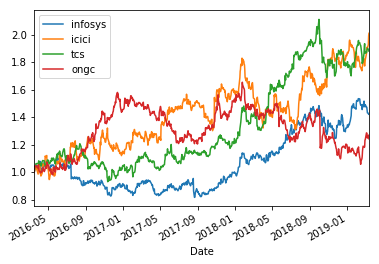

In [16]:
stock_normed = stocks/stocks.iloc[0]
stock_normed.plot()

In [17]:
stock_daily_ret = stocks.pct_change(1)
stock_daily_ret.head()

,infosys,icici,tcs,ongc
Date,,,,
2016-03-16,NaN,NaN,NaN,NaN
2016-03-17,0.008070,0.005962,0.010743,0.027843
2016-03-18,0.027243,0.010761,0.031377,0.011074
2016-03-21,0.001257,0.020198,0.008402,0.009548
2016-03-22,-0.004142,-0.005321,0.010980,-0.002534


# log returns

In [18]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,infosys,icici,tcs,ongc
Date,,,,
2016-03-16,NaN,NaN,NaN,NaN
2016-03-17,0.008037,0.005944,0.010686,0.027462
2016-03-18,0.026879,0.010703,0.030894,0.011014
2016-03-21,0.001256,0.019997,0.008366,0.009502
2016-03-22,-0.004151,-0.005335,0.010920,-0.002537


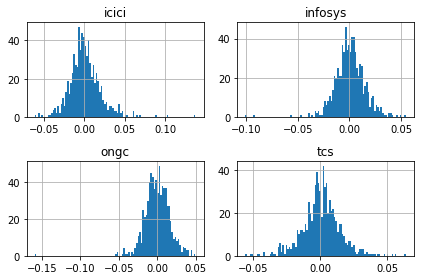

In [19]:
log_ret.hist(bins=100);
plt.tight_layout()

In [20]:
log_ret.describe()

,infosys,icici,tcs,ongc
count,738.000000,738.000000,738.000000,738.000000
mean,0.000479,0.000946,0.000856,0.000295
std,0.014506,0.019104,0.014540,0.016349
min,-0.100491,-0.061108,-0.055694,-0.159045
25%,-0.007356,-0.010154,-0.006778,-0.009040
50%,0.000221,-0.000820,0.000952,0.000242
75%,0.009214,0.010729,0.008740,0.010197
max,0.054754,0.137043,0.064115,0.049844


In [21]:
log_ret.mean() * 252

infosys    0.120682
icici      0.238463
tcs        0.215692
ongc       0.074308
dtype: float64

In [22]:
log_ret.cov()

,infosys,icici,tcs,ongc
infosys,0.000210,0.000016,0.000095,0.000007
icici,0.000016,0.000365,0.000002,0.000065
tcs,0.000095,0.000002,0.000211,0.000005
ongc,0.000007,0.000065,0.000005,0.000267


In [23]:
log_ret.cov()*252 

,infosys,icici,tcs,ongc
infosys,0.053030,0.004119,0.023920,0.001670
icici,0.004119,0.091972,0.000394,0.016405
tcs,0.023920,0.000394,0.053278,0.001158
ongc,0.001670,0.016405,0.001158,0.067360


In [25]:
num_ports = 15000

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(4))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [26]:
sharpe_arr.max()

1.2242507101377262

In [27]:
sharpe_arr.argmax()

7601

In [28]:
all_weights[7601,:]

array([0.05115014, 0.34237681, 0.54915184, 0.05732122])

In [29]:
#the following are the allocations according to the stock


In [30]:
max_sr_ret = ret_arr[7601]
max_sr_vol = vol_arr[7601]

# plotting

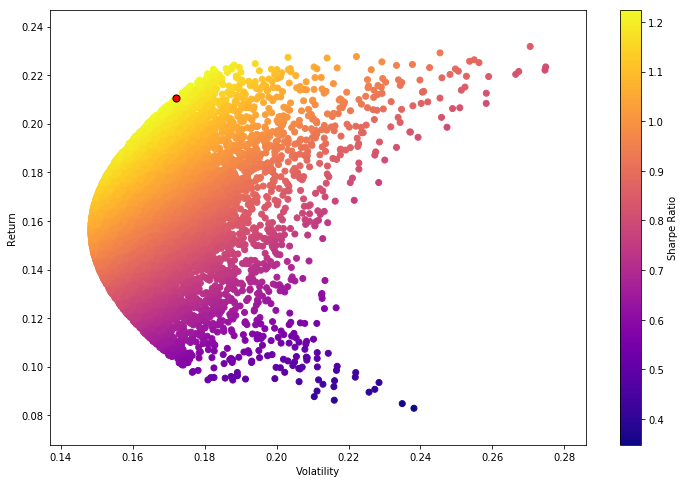

In [31]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

# more optimised way rather than running 15000 simulation

In [43]:
def get_ret_vol_sr(weights):
   
    #Takes in weights, returns array or return,volatility, sharpe ratio
    
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [44]:
from scipy.optimize import minimize

In [45]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [46]:
# Contraints
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1

In [47]:
cons = ({'type':'eq','fun': check_sum})

In [48]:
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))
init_guess = [0.25,0.25,0.25,0.25]

In [49]:
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [50]:
opt_results

     fun: -1.2244394856161056
     jac: array([ 0.00120752,  0.00025836, -0.00031574,  0.00044096])
 message: 'Optimization terminated successfully.'
    nfev: 43
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.04510383, 0.34985662, 0.54554789, 0.05949166])

In [51]:
opt_results.x

array([0.04510383, 0.34985662, 0.54554789, 0.05949166])

In [52]:
get_ret_vol_sr(opt_results.x)

array([0.21096239, 0.17229303, 1.22443949])

In [57]:
# efficient frontier hypothesis ( not quite imp)
# gives the best return for a particular volatility

In [53]:
frontier_y = np.linspace(0,0.3,100)

In [54]:
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1] 

In [55]:
frontier_volatility = []

for possible_return in frontier_y:
    # function for return
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

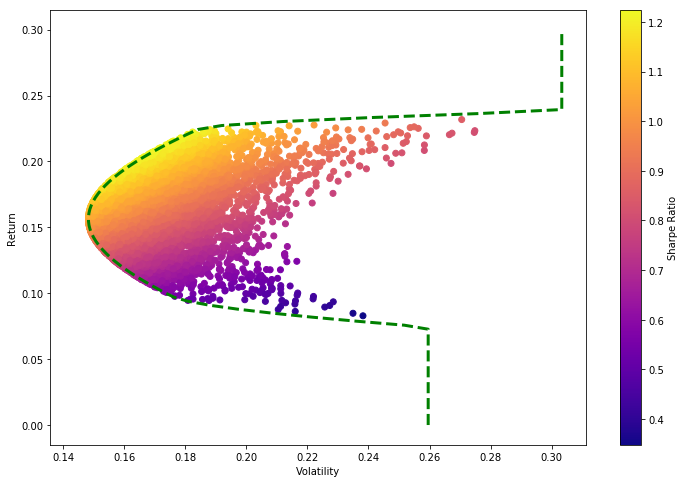

In [56]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')



# Add frontier line
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)